## This part of code obtains the best learnigng rate by comparing validation sse for different learning rates . 
<b>The best learning rate obtained  is 10^(-7) and then we go on to expirement with different lambdas . SSE is obtained 
for diffeent lambdas and corresponding weight vectors after 100000 iterations . Then the validation data is tested with 
each of weight vectors . From the graph plotted , we obtain that the validation SSE is minimum for 0.001 . Later we use weights generated for 0.001 to predict for test data </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
weight1 = pd.read_csv('weight_0.0001.csv')
weight2 = pd.read_csv('weight_1e-05.csv')
weight3 = pd.read_csv('weight_1e-06.csv')
weight4 = pd.read_csv('weight_1e-07.csv')

In [60]:
weight1

,weight,feature
0,-6.314734,1
1,-0.016919,2
2,7.585033,3
3,-0.756257,4
4,4.918300,5
5,2.960866,6
6,7.681923,7
7,8.606310,8
8,2.481608,9
9,4.239114,10


In [61]:
diff_wt ={
    0.0001:weight1.weight,
    0.00001:weight2.weight,
    0.000001:weight3.weight,
    0.0000001:weight4.weight
}

In [62]:
features = pd.read_csv('features_used.csv')
x_names = np.array(features['names'])

In [63]:
x_names

array(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'sqft_living15', 'dummy'], dtype=object)

In [64]:
main_df_val = pd.read_csv('PA1_dev.csv.xls')

In [65]:
df_val = main_df_val[x_names]
df_val.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,dummy
0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690,1
1,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800,1
2,3,2.50,3560,1.0,0,0,8,1860,1700,47.6007,2210,1
3,2,1.00,1160,1.0,0,0,7,860,300,47.6900,1330,1
4,3,2.00,1890,2.0,0,0,7,1890,0,47.7277,1890,1


In [66]:
df_val = df_val.drop(['dummy'],1)

In [67]:
for feature in df_val.columns:
    mn = df_val[feature].min()
    rnge = df_val[feature].max() - df_val[feature].min()
    df_val[feature] = df_val[feature].apply(lambda x : (x-mn)/rnge)

In [68]:
df_val['dummy']=main_df_val['dummy']

In [69]:
df_val.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,dummy
0,0.250,0.206897,0.165779,0.4,0.0,0.0,0.4,0.197339,0.082988,0.908027,0.184116,1
1,0.250,0.172414,0.098099,0.0,0.0,0.0,0.5,0.143016,0.000000,0.738707,0.203971,1
2,0.250,0.241379,0.241065,0.0,0.0,0.0,0.5,0.162971,0.352697,0.712545,0.277978,1
3,0.125,0.034483,0.058555,0.0,0.0,0.0,0.4,0.052106,0.062241,0.857654,0.119134,1
4,0.250,0.172414,0.114068,0.4,0.0,0.0,0.4,0.166297,0.000000,0.918915,0.220217,1


In [70]:
def calculate_sse(weight):
    print(df_val.shape,weight.shape)
    p = df_val.dot(np.array(weight)) 
    y = main_df_val['price']
    diff = p - y
    sse = (np.transpose(diff)).dot(diff)
    return sse

In [71]:
learning_rate = [0.0001,0.00001,0.000001,0.0000001]
for lr in learning_rate:
    sse = calculate_sse(diff_wt[lr])
    print("lr = ",lr," sse = ",sse)
    

(5597, 12) (12,)
lr =  0.0001  sse =  42092.233530221536
(5597, 12) (12,)
lr =  1e-05  sse =  42392.654374075384
(5597, 12) (12,)
lr =  1e-06  sse =  31865.8394104541
(5597, 12) (12,)
lr =  1e-07  sse =  26098.742670731357


In [53]:
############### thus choosing learn rate = 10**(-7)

In [97]:
main_df_train = pd.read_csv('PA1_train.csv.xls')
df_train = main_df_train.drop(['id','dummy'],1)

In [98]:
df_train.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [99]:
df_train['date'] = pd.to_datetime(main_df_train['date'])
df_train['month'] = df_train['date'].apply(lambda x:x.month)
df_train['year'] =  df_train['date'].apply(lambda x:x.year)
df_train['day'] = df_train['date'].apply(lambda x:x.day)

In [100]:
df_train.columns.shape

(23,)

In [101]:
df_train = df_train.drop(['date'],1)
df_train.shape

(10000, 22)

In [102]:
df_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'month', 'year', 'day'],
      dtype='object')

In [103]:
y_train = df_train['price']
df_train = df_train.drop(['price'],1)

In [104]:
for feature in df_train.columns:
    mn = df_train[feature].min()
    rnge = df_train[feature].max() - df_train[feature].min()
    df_train[feature] = df_train[feature].apply(lambda x : (x-mn)/rnge)

In [105]:
df_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day
0,0.09375,0.275862,0.246849,0.005715,0.4,0.0,0.0,0.50,0.555556,0.276796,...,0.773913,0.0,0.368687,0.761782,0.394979,0.400000,0.011601,0.545455,0.0,0.266667
1,0.03125,0.275862,0.234244,0.002682,0.0,0.0,0.0,1.00,0.444444,0.109541,...,0.226087,0.0,0.631313,0.683127,0.112971,0.318584,0.004985,0.545455,0.0,0.566667
2,0.12500,0.172414,0.134454,0.001471,0.2,0.0,0.0,0.50,0.444444,0.150766,...,0.017391,0.0,0.722222,0.707093,0.174059,0.226549,0.003837,0.545455,0.0,0.200000
3,0.09375,0.172414,0.141807,0.005469,0.0,0.0,0.0,0.75,0.444444,0.159011,...,0.600000,0.0,0.292929,0.515522,0.300418,0.212389,0.011556,0.272727,1.0,0.900000
4,0.15625,0.241379,0.363445,0.006426,0.0,0.0,0.5,1.00,0.555556,0.243816,...,0.539130,0.0,0.035354,0.690043,0.335565,0.361062,0.011188,0.727273,0.0,0.100000


In [106]:
def check_explode(norm):
    does_explode = True
    for i in range(1,len(norm)-1):
        if norm[i]<norm[i-1]:
            does_explode = False
    return does_explode

In [107]:
df_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.074225,0.223293,0.179645,0.008794,0.201480,0.007000,0.057350,0.602275,0.408133,0.167621,...,0.618477,0.040311,0.390369,0.649693,0.251643,0.271562,0.013884,0.508400,0.318500,0.493403
std,0.029476,0.105535,0.095728,0.024960,0.217059,0.083377,0.188983,0.163398,0.131118,0.097864,...,0.256353,0.195722,0.270295,0.223018,0.118330,0.122460,0.032441,0.282858,0.465918,0.287392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.172414,0.111345,0.002704,0.000000,0.000000,0.000000,0.500000,0.333333,0.096584,...,0.443478,0.000000,0.161616,0.505549,0.155649,0.182301,0.005091,0.272727,0.000000,0.233333
50%,0.062500,0.241379,0.162815,0.004269,0.200000,0.000000,0.000000,0.500000,0.333333,0.140165,...,0.660870,0.000000,0.323232,0.668168,0.237657,0.246018,0.007995,0.454545,0.000000,0.500000
75%,0.093750,0.275862,0.228992,0.006166,0.400000,0.000000,0.000000,0.750000,0.444444,0.219081,...,0.843478,0.000000,0.587121,0.838829,0.325523,0.339823,0.010839,0.727273,1.000000,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
all_info={}

In [143]:
import math
def calculate_weights_and_sse(df,max_iteration,check_iter_for_explode,lmbda,learning_rate=0.0000001):
    
    weight = np.array(np.random.randn(1,21)[0])
    
    number_of_iteration = 0
    sse_for_each_iter = [] 
    norm_for_this_lr = []
    while True:
        diff_in_y = df.dot(weight)-y_train
        
        
        gradient = (np.transpose(df)).dot(diff_in_y) + 2*lmbda*weight
        
        weight = weight - learning_rate*gradient 
        norm_for_gradient = math.sqrt(gradient.dot(gradient))
        
        sse = (np.transpose(diff_in_y)).dot(diff_in_y) + lmbda*(norm_for_gradient**2)
        
        
        
        
        
        #print('number of iteration',number_of_iteration,norm_for_gradient,'   sse =',sse)
        
        
        sse_for_each_iter.append(sse)
        
        norm_for_this_lr.append(norm_for_gradient)
        
        
        number_of_iteration = number_of_iteration + 1
        
        
        if(norm_for_gradient<=0.5):
            
            all_info[lmbda] = {"whether converged":True,
                               "weights":weight,
                               "sse_for_each_iteration":sse_for_each_iter,
                               "number_of_iteration_used":number_of_iteration
                              }
            print("########################")
            print("number of itertion used for lmbda =",lmbda , " is ",number_of_iteration , 'and sse is ' ,sse)
            print("########################")
            break
            
            
        if(number_of_iteration == check_iter_for_explode and check_explode(norm_for_this_lr)):
            
            print('Gradient explodes for learning_rate =',learning_rate)
            all_info[lmbda] = {"whether converged":False,
                               "weights":np.array(np.zeros(12)),
                               "sse_for_each_iteration":np.array([-1]*12),
                               "number_of_iteration_used":number_of_iteration
                              }
            break
            
        if(number_of_iteration==max_iteration):
    
            all_info[lmbda] = {"whether converged":True,
                               "weights":weight,
                               "sse_for_each_iteration":sse_for_each_iter,
                               "number_of_iteration_used":number_of_iteration
                              }
            print("converges but takes too many iterations  for lambda =",lmbda)
            break
            
            
        if (number_of_iteration%5000)==0:
            print('number of iteration',number_of_iteration,norm_for_gradient,sse)
    
    print('checked for lambda = ',lmbda," now returning")
    return
        
            


In [150]:
lmbda_values = [0.001,0.01,0.1,0,1,10,100]
for lmb in lmbda_values[:1]:
    print('calculating everything for lmbda = ',lmb,'\n\n')
    calculate_weights_and_sse(df_train,100000,100,lmb)

calculating everything for lmbda =  0.001 


number of iteration 5000 3953.391108623146 94866.21992209915
number of iteration 10000 3070.158008505448 76476.81486105984
number of iteration 15000 2454.127470784738 65502.98799012292
number of iteration 20000 1999.0736869370403 58549.807360480416
number of iteration 25000 1654.389053324791 53971.69073226203
number of iteration 30000 1389.0689212703576 50859.72213456328
number of iteration 35000 1182.2606822533098 48682.16510989132
number of iteration 40000 1019.2534905389226 47116.326075368575
number of iteration 45000 889.3757042781946 45960.85953753021
number of iteration 50000 784.7590907108071 45087.17129534546
number of iteration 55000 699.5483828567017 44411.37665208678
number of iteration 60000 629.3622849932688 43877.64091572249
number of iteration 65000 570.9094212334195 43448.05710898071
number of iteration 70000 521.707427465312 43096.38004649695
number of iteration 75000 479.87490297088675 42804.08295862966
number of iteration 

In [151]:
lmbda_values = [0.001,0.01,0.1,0,1,10,100]
for lmb in lmbda_values[1:3]:
    print('calculating everything for lmbda = ',lmb,'\n\n')
    calculate_weights_and_sse(df_train,100000,100,lmb)

calculating everything for lmbda =  0.01 


number of iteration 5000 4666.816624672163 302907.1552322915
number of iteration 10000 3426.5732150585563 186458.46143740794
number of iteration 15000 2628.709836422897 129076.48769014035
number of iteration 20000 2066.88629598309 97228.56298687053
number of iteration 25000 1657.3890157795715 78534.58094440239
number of iteration 30000 1353.6742526554626 67137.20988470822
number of iteration 35000 1126.186968927287 59967.25990349583
number of iteration 40000 954.6891315745524 55321.75431663274
number of iteration 45000 824.6386988783155 52219.927325916506
number of iteration 50000 725.2923069694199 50081.995348747485
number of iteration 55000 648.6223294662576 48558.32128415069
number of iteration 60000 588.6353046119526 47434.49701307612
number of iteration 65000 540.8935645351668 46576.99111484759
number of iteration 70000 502.14839919464487 45901.34834804996
number of iteration 75000 470.0469760139227 45353.27938374704
number of iteration 

In [148]:
lmbda_values = [0.001,0.01,0.1,1,10,100]
for lmb in lmbda_values[3:6]:
    print('calculating everything for lmbda = ',lmb,'\n\n')
    calculate_weights_and_sse(df_train,100000,100,lmb)

calculating everything for lmbda =  1 


number of iteration 5000 3850.0948119418767 14900658.282675557
number of iteration 10000 2929.785709809465 8649825.87373344
number of iteration 15000 2357.623423891707 5617614.645058472
number of iteration 20000 1936.2612107421692 3803727.598937871
number of iteration 25000 1614.3752205595774 2657669.3012909056
number of iteration 30000 1364.8304516164796 1911994.9456908188
number of iteration 35000 1169.3240879934826 1414934.4627051463
number of iteration 40000 1014.6646274562754 1075955.603118469
number of iteration 45000 891.0994211311307 839549.9467794424
number of iteration 50000 791.3332777435535 670981.5493019668
number of iteration 55000 709.880361361556 548129.6929425572
number of iteration 60000 642.6058031992367 456674.9885331249
number of iteration 65000 586.3882911419032 387197.59479101864
number of iteration 70000 538.8668600341632 333399.1538465037
number of iteration 75000 498.24979546798636 290998.04162663524
number of iteration

In [153]:
###Training SSE
all_info.keys()
calculate_weights_and_sse(df_train,100000,100,0.00001)

# for l in lmbda_values:
#     data_l = all_info[l]
#     sse_value_train=data_l['sse_for_each_iteration']
#     length = len(sse_value_train)
#     print("lambda = ",l," and sse = ",sse_value_train[length-1] ," for 200000 iterations")


number of iteration 5000 4243.150229605829 84858.54839396563
number of iteration 10000 3293.642007258502 70784.62495467352
number of iteration 15000 2631.103319351139 62028.71924793841
number of iteration 20000 2130.6351654692376 56369.27308698399
number of iteration 25000 1748.722925470233 52612.962923711064
number of iteration 30000 1456.4553165527186 50048.846539998325
number of iteration 35000 1231.9752565446545 48244.775401440595
number of iteration 40000 1058.5183482363175 46935.06922287955
number of iteration 45000 923.2757514109747 45954.396166208535
number of iteration 50000 816.5541112091834 45198.37864474703
number of iteration 55000 731.1069937546567 44599.98557276937
number of iteration 60000 661.5840318115103 44115.30657367803
number of iteration 65000 604.075168076209 43714.9254191745
number of iteration 70000 555.7409535476118 43378.64922669948
number of iteration 75000 514.5220707955848 43092.25839368556
number of iteration 80000 478.91877674832836 42845.48018066739
nu

In [155]:

calculate_weights_and_sse(df_train,100000,100,0.0001)


number of iteration 5000 4827.788623297959 94592.61469582534
number of iteration 10000 3681.867468079248 75676.19162278641
number of iteration 15000 2855.9649389844135 64536.47628575211
number of iteration 20000 2252.776152337358 57752.08757090865
number of iteration 25000 1808.1237828847595 53477.324249819896
number of iteration 30000 1477.8643862616598 50686.72012986799
number of iteration 35000 1230.9507983774254 48796.27844690202
number of iteration 40000 1045.1280853954513 47465.8115758571
number of iteration 45000 904.1942100306545 46492.91339779663
number of iteration 50000 796.2378644152137 45754.68452867197
number of iteration 55000 712.4771273145049 45174.988216534475
number of iteration 60000 646.458405822714 44705.681934085915
number of iteration 65000 593.4722658215547 44315.6657789068
number of iteration 70000 550.1090177999284 43984.38805779545
number of iteration 75000 513.9154781902178 43697.936242040574
number of iteration 80000 483.1320836148171 43446.65052412926
num

In [154]:
all_info.keys()

dict_keys([0.01, 0.1, 0.001, 1, 10, 100, 1e-05])

In [183]:
lmbda_values = [0.001, 0.01, 0.1, 1, 10, 100]

In [184]:
for lmbda in lmbda_values:
    sse_values = all_info[lmbda]['sse_for_each_iteration']
    l = len(sse_values)
    print(l)
    iteration = np.array([x for x in range(1,l+1)])
    print(len(iteration))
    output = pd.DataFrame({'sse': all_info[lmbda]['sse_for_each_iteration'],'iteration':iteration})
    name = 'sse_regular_'+ str(lmbda) + '.csv'
    output.to_csv(name, index=False)
    weight_values = all_info[lmbda]['weights']
    print(len(weight_values))
    itera = np.array([x for x in range(1,22)])
    print(len(itera))
    output = pd.DataFrame({'weight': all_info[lmbda]['weights'],'feature':itera})
    name = 'weight_regular_'+ str(lmbda) + '.csv'
    output.to_csv(name, index=False)

100000
100000
21
21
100000
100000
21
21
100000
100000
21
21
100000
100000
21
21
100000
100000
21
21
100000
100000
21
21


In [165]:
df_validation = main_df_val
y_validation = df_validation['price']
df_validation = df_validation.drop(['id','dummy','price'],1)
df_validation['date'] = pd.to_datetime(main_df_val['date'])
df_validation['month'] = df_validation['date'].apply(lambda x:x.month)
df_validation['year'] =  df_validation['date'].apply(lambda x:x.year)
df_validation['day'] = df_validation['date'].apply(lambda x:x.day)
df_validation = df_validation.drop(['date'],1)


In [166]:
df_validation.shape

(5597, 21)

In [167]:
df_validation.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year', 'day'],
      dtype='object')

In [175]:
training_x =[]
testing_x = []
for feature in df_validation.columns:
    mn = df_validation[feature].min()
    mx = df_validation[feature].max()
    df_validation[feature] = df_validation[feature].apply(lambda x:((x-mn)/(mx-mn)))

def calculate_sse_for_diff_lambda(weight):
    diff_in_y = df_validation.dot(weight)-y_validation
    error = (np.transpose(diff_in_y)).dot(diff_in_y)
    return error
    
lambda_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
for lmbda in lambda_values:
    info = all_info[lmbda]
    weights = np.array(info['weights'])
    sse_all = info['sse_for_each_iteration']
    training_sse = sse_all[len(sse_all)-1] - weights.dot(weights)
    training_x.append(training_sse)
    c = calculate_sse_for_diff_lambda(weights)
    testing_x.append(c)
    print('For lambda = ',lmbda , ' the training sse is = ',training_sse,' whereas the validation sse is '
         
         ,c)
    
    
        


For lambda =  1e-05  the training sse is =  41965.42201510622  whereas the validation sse is  24466.218059246465
For lambda =  0.0001  the training sse is =  42519.743461199556  whereas the validation sse is  24828.419234048302
For lambda =  0.001  the training sse is =  41704.0184368273  whereas the validation sse is  24244.094722420006
For lambda =  0.01  the training sse is =  43449.19075386196  whereas the validation sse is  24481.53636907484
For lambda =  0.1  the training sse is =  57392.604142810436  whereas the validation sse is  24642.476095379345
For lambda =  1  the training sse is =  171593.20981683955  whereas the validation sse is  24875.30910548208
For lambda =  10  the training sse is =  1224391.9274490618  whereas the validation sse is  26258.722770973047
For lambda =  100  the training sse is =  947542.5421394401  whereas the validation sse is  29643.98732255047


In [176]:
#Log scale variation with respect to lambda

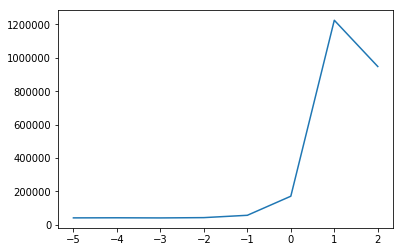

In [177]:
sns.lineplot(y=training_x,x=[-5,-4,-3,-2,-1,0,1,2])

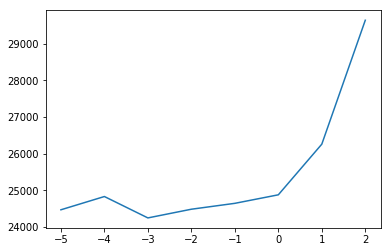

In [178]:
sns.lineplot(y=testing_x,x=[-5,-4,-3,-2,-1,0,1,2])

`#Thus for lambda = 0.001 minimum SSE is observed  `

In [185]:
df_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year', 'day'],
      dtype='object')

In [186]:
all_info[0.001]['weights']

bedrooms         0.333747
bathrooms        3.250678
sqft_living      4.820770
sqft_lot         0.033134
floors           1.108012
waterfront       2.259873
view             3.413060
condition        0.275100
grade            7.240978
sqft_above       4.114920
sqft_basement    1.268317
yr_built        -3.264497
yr_renovated     0.325164
zipcode         -1.285211
lat              3.354221
long            -2.358106
sqft_living15    3.762486
sqft_lot15      -0.131697
month           -0.761713
year            -0.154484
day             -0.481151
dtype: float64

In [187]:
# We see that the |w| is very less for features: bedrooms , sqft_lot , condition ,yr_renovated , year , day ,sqft_lot15

In [189]:
#these features contribute least . Features with large positive w increse the price more than others for small 
#increase in their own values. For negative w's it's just the opposite


In [190]:
#The validation sse slightly decreses around 0.001 and 0.01 and then shoots to a large value for lambda = 100 .
#Its shown in the graph

In [191]:
#For large values of lambda the model overfits and hence the sse for validations shoots high while training sse still remains
#close to other values

In [192]:
all_info[0.01]['weights']

bedrooms         1.661162
bathrooms        3.417870
sqft_living      5.236076
sqft_lot        -0.923248
floors           1.208596
waterfront       2.330987
view             3.159152
condition        0.193550
grade            5.519379
sqft_above       5.825953
sqft_basement    1.724561
yr_built        -3.460527
yr_renovated     0.189985
zipcode         -0.989929
lat              3.323527
long            -1.361451
sqft_living15    3.835036
sqft_lot15      -0.837677
month           -0.794102
year            -0.178518
day             -0.476231
dtype: float64

In [194]:
#day , year , month , condition approach zero contribution

In [193]:
all_info[10]['weights']

bedrooms        -0.777466
bathrooms        2.311313
sqft_living      5.328734
sqft_lot         0.141402
floors           1.599251
waterfront       1.736437
view             3.316684
condition        0.366504
grade            5.572033
sqft_above       4.357860
sqft_basement    2.049118
yr_built        -2.859027
yr_renovated     0.395000
zipcode         -1.154453
lat              3.375116
long            -1.845189
sqft_living15    3.890174
sqft_lot15       0.793149
month           -0.614438
year            -0.088270
day             -0.440671
dtype: float64

In [ ]:
#bedrooms , yr_renovated , condition , year , day , sqft_lot approach zero contribution